In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')  

In [77]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500) 

In [78]:
fifaB = pd.read_csv('/Users/Bijou/Desktop/Ironhack_prework_activities/Week_5/PROJECT/fifa21_male2.csv')  

In [79]:
fifaB.head(2)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male


In [80]:
fifaB.columns =list(map(lambda x:x.lower(), fifaB.columns)) 
fifaB.head(2)

,id,name,age,ova,nationality,club,bov,bp,position,player photo,club logo,flag photo,pot,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male


In [81]:
fifaB.drop(['player photo', 
            'club logo','flag photo',
            'joined','loan date end',
            'release clause','gender',
            'contract'
            ], axis =1, inplace=True)

In [82]:
print(fifaB['name'].value_counts()) 
print(fifaB['name'].unique())  

rows=fifaB.shape[0]
columns=fifaB.shape[1]
print('Rows:',rows)
print('Columns:',columns)

J. Rodríguez       10
A. Traoré           8
J. Rojas            8
M. Smith            7
J. Jones            7
                   ..
S. Reyes            1
T. Johnson          1
E. García           1
Y. Begraoui         1
F. Quagliarella     1
Name: name, Length: 16176, dtype: int64
['G. Pasquale' 'Luis García' 'J. Cole' ... 'C. Barrett' 'J. Gazibegović'
 'Pablo Rodríguez']
Rows: 17125
Columns: 99


In [83]:

fifaB['w/f']= fifaB['w/f'].astype(str).str[:1].astype(np.int64)  
fifaB['sm']= fifaB['sm'].astype(str).str[:1].astype(np.int64)  
fifaB['ir']= fifaB['ir'].astype(str).str[:1].astype(np.int64)   
# --------------------------------------------------------------------------------
fifaB['ls']= fifaB['ls'].astype(str).str[:2].astype(np.int64)  
fifaB['st']= fifaB['st'].astype(str).str[:2].astype(np.int64)  
fifaB['rs']= fifaB['rs'].astype(str).str[:2].astype(np.int64) 
fifaB['lw']= fifaB['lw'].astype(str).str[:2].astype(np.int64) 
fifaB['lf']= fifaB['lf'].astype(str).str[:2].astype(np.int64)  
fifaB['cf']= fifaB['cf'].astype(str).str[:2].astype(np.int64) 
fifaB['rf']= fifaB['rf'].astype(str).str[:2].astype(np.int64)  
fifaB['rw']= fifaB['rw'].astype(str).str[:2].astype(np.int64)   

fifaB['lam']= fifaB['lam'].astype(str).str[:2].astype(np.int64)   
fifaB['cam']= fifaB['cam'].astype(str).str[:2].astype(np.int64)    
fifaB['ram']= fifaB['ram'].astype(str).str[:2].astype(np.int64)   
fifaB['lm']= fifaB['lm'].astype(str).str[:2].astype(np.int64)  
fifaB['lcm']= fifaB['lcm'].astype(str).str[:2].astype(np.int64)    
fifaB['cm']= fifaB['cm'].astype(str).str[:2].astype(np.int64)   
fifaB['rcm']= fifaB['rcm'].astype(str).str[:2].astype(np.int64)    
fifaB['rm']= fifaB['rm'].astype(str).str[:2].astype(np.int64)    
fifaB['lwb']= fifaB['lwb'].astype(str).str[:2].astype(np.int64)   
fifaB['ldm']= fifaB['rw'].astype(str).str[:2].astype(np.int64)   
fifaB['cdm']= fifaB['cdm'].astype(str).str[:2].astype(np.int64)   
fifaB['rdm']= fifaB['rdm'].astype(str).str[:2].astype(np.int64)   
fifaB['rwb']= fifaB['rwb'].astype(str).str[:2].astype(np.int64)  
fifaB['lb']= fifaB['lb'].astype(str).str[:2].astype(np.int64) 
fifaB['lcb']= fifaB['lcb'].astype(str).str[:2].astype(np.int64)  
fifaB['cb']= fifaB['cb'].astype(str).str[:2].astype(np.int64)  
fifaB['rcb']= fifaB['rcb'].astype(str).str[:2].astype(np.int64)    
fifaB['rb']= fifaB['rb'].astype(str).str[:2].astype(np.int64)  


#one data value has a K in hits ??? error  
#be best to replace this one data point as a null?
#fifaB['hits']=fifaB['hits'].astype(str).str.strip('K').astype(np.int64)


- if you want to know what all the abbreviations mean #https://www.console-deals.com/blog/fifa-terminology-glossary-5504/
  - sm = skill moves (ability to pull of skill moves)
  - pac = pace (the speed of the player)
      -compare speed weights and height of players 
  - sho = shooting (the players shooting ability )
  - pas = passing (passing ability)
  - dri = dribbling 
  - def = defending (players all round defensive abilites, including tackling, heading and positioning)
  - phy = physical (players overall physical attributes including strength)
  - st = striker 
  - lw = left winger 
  - lf= ?could mean left fielder?
  - cf = center forward 
  - rf = ?right forward?
  - rw = right winger (more attacking option than a right midfielder )
  - cam = central attacking midfielder 
  - lm = left midfielder 
  - cm = center midfielder 
  - rm = right midfielder 
  - cdm = central defensive midfielder 
  - lb = left back 
  - cb = center back 
  - rb = right back 
  - gk = goal keeper  
      make a table specifically for the goal keeper stats 

In [84]:
fifaB= fifaB.rename(columns = {  
    'sm':'skill moves',
    'cm':'central midfielder',  
    'pac':'pace',
    'sho':'shooting', 
    'pas':'passing', 
    'dri':'dribbling',
    'def':'defending',
    'phy':'physical',
    'st':'striker',
    'lw':'left winger',
    'cf':'center forward',
    'rw':'right winger',
    'cam':'central attacking midfielder',
    'lm':'left midfielder',
    'cm':'center midfielder', 
    'rm':'right midfielder',
    'cdm':'central defensive midfielder',
    'lb':'left back',
    'cb':'center back',
    'rb':'right back', 
    'gk':'goal keeper', 
    'sliding tackle':'sliding_tackle'
    
})

In [85]:
#to type press alt option shift 2 = € 
fifaB['value']=fifaB['value'].str.strip('€')
fifaB['wage']=fifaB['wage'].str.strip('€') 

  
fifaB['weight']=fifaB['weight'].str.strip('lbs').astype(np.int64)  

#fifaB['cb']= fifaB['cb'].astype(str).str[:2].astype(np.int64)  

In [86]:
fifaB.head()

,id,name,age,ova,nationality,club,bov,bp,position,pot,team & contract,height,weight,foot,growth,value,wage,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding_tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,skill moves,a/w,d/w,ir,pace,shooting,passing,dribbling,defending,physical,hits,ls,striker,rs,left winger,lf,center forward,rf,right winger,lam,central attacking midfielder,ram,left midfielder,lcm,center midfielder,rcm,right midfielder,lwb,ldm,central defensive midfielder,rdm,rwb,left back,lcb,center back,rcb,right back,goal keeper
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",181,Left,0,625K,7K,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,68,70,70,71,70,69,69,69,70,17+0
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143,Right,0,600K,7K,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,67,66,66,62,60,60,60,60,60,17+1
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161,Right,0,1.1M,15K,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,70,54,54,52,47,46,46,46,47,15+0
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,Sunderland 2009,"5'11""",165,Right,14,0,0,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3,1,NaN,NaN,1,61,66,66,69,47,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,66,65,65,56,57,51,51,51,57,22+0
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150,Right,0,5.5M,12K,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,79,73,73,70,67,64,64,64,67,17+3


In [87]:
fifaB.dtypes

id                                int64
name                             object
age                               int64
ova                               int64
nationality                      object
club                             object
bov                               int64
bp                               object
position                         object
pot                               int64
team & contract                  object
height                           object
weight                            int64
foot                             object
growth                            int64
value                            object
wage                             object
attacking                         int64
crossing                          int64
finishing                         int64
heading accuracy                  int64
short passing                     int64
volleys                         float64
skill                             int64
dribbling                         int64


In [88]:
#remove null values 

In [89]:
nulls = pd.DataFrame(fifaB.isna().sum()) 
nulls = nulls.reset_index()
nulls.columns=['header_name','count']
nulls

,header_name,count
0,id,0
1,name,0
2,age,0
3,ova,0
4,nationality,0
5,club,23
6,bov,0
7,bp,0
8,position,413
9,pot,0


In [90]:
to_check=nulls[nulls['count']>0] 
to_check 
#delete the null values for interceptions and positioning  
#replace with the mean for everything else 


,header_name,count
5,club,23
8,position,413
22,volleys,58
25,curve,58
32,agility,58
34,balance,58
37,jumping,58
43,interceptions,7
44,positioning,7
45,vision,58


In [91]:
list(to_check['header_name'].values)

['club',
 'position',
 'volleys',
 'curve',
 'agility',
 'balance',
 'jumping',
 'interceptions',
 'positioning',
 'vision',
 'composure',
 'sliding_tackle',
 'a/w',
 'd/w']

In [92]:
mean_fifaB_jumping =fifaB['jumping']= np.mean(fifaB['jumping']) 
fifaB['jumping']=fifaB['jumping'].fillna(mean_fifaB_jumping) 

mean_fifaB_volleys =fifaB['volleys']= np.mean(fifaB['volleys']) 
fifaB['volleys']=fifaB['volleys'].fillna(mean_fifaB_volleys)  

mean_fifaB_curve =fifaB['curve']= np.mean(fifaB['curve']) 
fifaB['curve']=fifaB['curve'].fillna(mean_fifaB_curve)  

mean_fifaB_agility =fifaB['agility']= np.mean(fifaB['agility']) 
fifaB['agility']=fifaB['agility'].fillna(mean_fifaB_agility) 

mean_fifaB_balance =fifaB['balance']= np.mean(fifaB['balance']) 
fifaB['balance']=fifaB['balance'].fillna(mean_fifaB_balance) 

mean_fifaB_interceptions =fifaB['interceptions']= np.mean(fifaB['interceptions']) 
fifaB['interceptions']=fifaB['interceptions'].fillna(mean_fifaB_interceptions) 

mean_fifaB_positioning =fifaB['positioning']= np.mean(fifaB['positioning']) 
fifaB['positioning']=fifaB['positioning'].fillna(mean_fifaB_positioning)  

mean_fifaB_vision =fifaB['vision']= np.mean(fifaB['vision']) 
fifaB['vision']=fifaB['vision'].fillna(mean_fifaB_vision) 

mean_fifaB_composure =fifaB['composure']= np.mean(fifaB['composure']) 
fifaB['composure']=fifaB['composure'].fillna(mean_fifaB_composure) 

mean_fifaB_sliding_tackle =fifaB['sliding_tackle']= np.mean(fifaB['sliding_tackle']) 
fifaB['sliding_tackle']=fifaB['sliding_tackle'].fillna(mean_fifaB_sliding_tackle)  

#error 
#mean_fifaB_d/w =fifaB['d/w']= np.mean(fifaB['d/w']) 
#fifaB['d/w']=fifaB['d/w'].fillna(mean_fifaB_d/w) 

#error 
#mean_fifaB_a/w =fifaB['a/w']= np.mean(fifaB['a/w']) 
#fifaB['a/w']=fifaB['a/w'].fillna(mean_fifaB_a/w) 

In [93]:
clean = pd.DataFrame(fifaB.isna().sum()) 
clean= clean.reset_index()
clean.columns=['header_name','count']
clean

,header_name,count
0,id,0
1,name,0
2,age,0
3,ova,0
4,nationality,0
5,club,23
6,bov,0
7,bp,0
8,position,413
9,pot,0


In [94]:
print('before:',fifaB.shape)
name = fifaB.copy()
name = name.drop_duplicates(subset=['name']) 
print('after name duplicate removal',name.shape) 
name.head(2)

before: (17125, 99)
after name duplicate removal (16176, 99)


,id,name,age,ova,nationality,club,bov,bp,position,pot,team & contract,height,weight,foot,growth,value,wage,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding_tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,skill moves,a/w,d/w,ir,pace,shooting,passing,dribbling,defending,physical,hits,ls,striker,rs,left winger,lf,center forward,rf,right winger,lam,central attacking midfielder,ram,left midfielder,lcm,center midfielder,rcm,right midfielder,lwb,ldm,central defensive midfielder,rdm,rwb,left back,lcb,center back,rcb,right back,goal keeper
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",181,Left,0,625K,7K,313,75,50,59,71,45.005742,338,73,49.574676,60,69,71,347,68,74,64.602273,69,64.715591,347,74,65.170212,69,68,68,320,72,47.085582,52.372766,55.443605,50,59.940965,208,70,69,46.099725,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,68,70,70,71,70,69,69,69,70,17+0
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143,Right,0,600K,7K,337,68,64,61,76,45.005742,369,69,49.574676,79,71,71,305,56,50,64.602273,65,64.715591,324,75,65.170212,64,60,71,362,71,47.085582,52.372766,55.443605,75,59.940965,153,70,43,46.099725,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,67,66,66,62,60,60,60,60,60,17+1


- age distribution 
- nationality distribution 

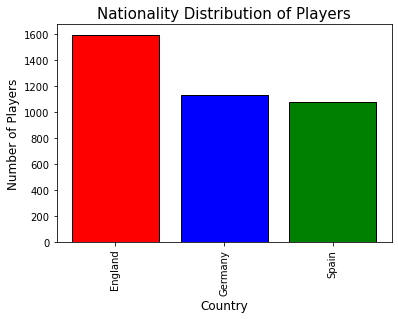

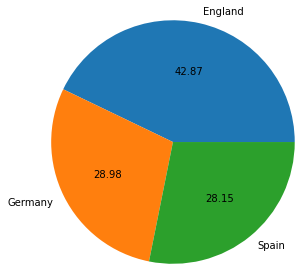

In [95]:
import matplotlib.pyplot as plt

x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
x=x.rename(columns={'index':'nationality','nationality':'count'}) 
x=x[x['count']>1000]

plt.bar(x['nationality'],x['count'],color=['red','blue','green'],ec='black')
plt.title('Nationality Distribution of Players',fontsize='15')
plt.xlabel('Country',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  
 
#---------------------------------    
BBBB='England','Germany','Spain'
values = [1707,1154,1121] 
plt.pie(values,
        labels=BBBB,
        autopct='%0.2f',
        radius=1.4
       )
plt.show() 
    

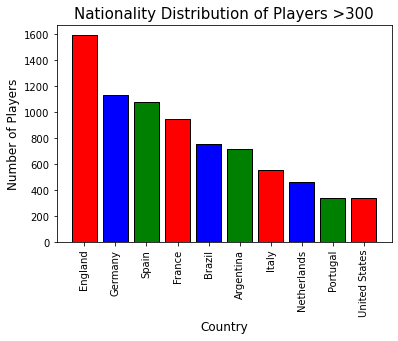

In [101]:
import matplotlib.pyplot as plt

x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
x=x.rename(columns={'index':'nationality','nationality':'count'}) 
x=x[x['count']>300]
plt.bar(x['nationality'],x['count'],color=['red','blue','green'],ec='black')
plt.title('Nationality Distribution of Players >300',fontsize='15')
plt.xlabel('Country',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  





In [ ]:

%matplotlib inline

x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
x=x.rename(columns={'index':'nationality','nationality':'count'}) 
x=x[(x['count']<265)&(x['count']>150)]

plt.bar(x['nationality'],x['count'],color=['red','blue','green'],ec='black')
plt.title('Nationality Distribution of Players',fontsize='15')
plt.xlabel('Country',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()

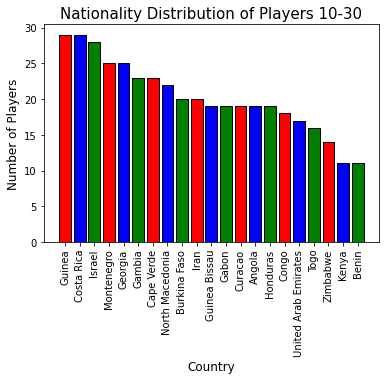

In [102]:
#how to create a range 

%matplotlib inline

x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
x=x.rename(columns={'index':'nationality','nationality':'count'}) 
x=x[(x['count']<30)&(x['count']>10)]

plt.bar(x['nationality'],x['count'],color=['red','blue','green'],ec='black')
plt.title('Nationality Distribution of Players 10-30',fontsize='15')
plt.xlabel('Country',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  

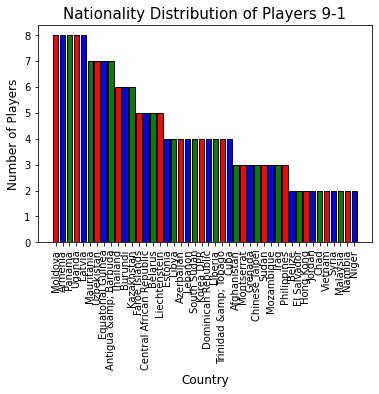

In [97]:

%matplotlib inline

x=pd.DataFrame((name['nationality'].value_counts()).reset_index())
x=x.rename(columns={'index':'nationality','nationality':'count'}) 
x=x[(x['count']<9)&(x['count']>1)]



plt.bar(x['nationality'],x['count'],color=['red','blue','green'],ec='black')
plt.title('Nationality Distribution of Players 9-1',fontsize='15')
plt.xlabel('Country',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  

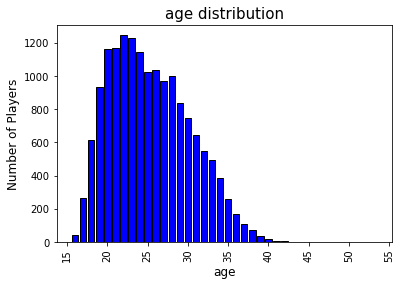

In [98]:
x= pd.DataFrame((name['age'].value_counts()).reset_index())
x=x.rename(columns={'index':'age','age':'count'}) 
x

plt.bar(x['age'],x['count'],color=['blue'],ec='black')
plt.title('age distribution',fontsize='15')
plt.xlabel('age',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  



In [107]:
x=pd.DataFrame((name['weight'].value_counts()).reset_index())
x=x.rename(columns={'index':'weight','weight':'count'}) 
x


 

,weight,count
0,154,1262
1,165,1233
2,176,970
3,159,872
4,172,858
5,161,809
6,163,807
7,168,778
8,170,725
9,150,618


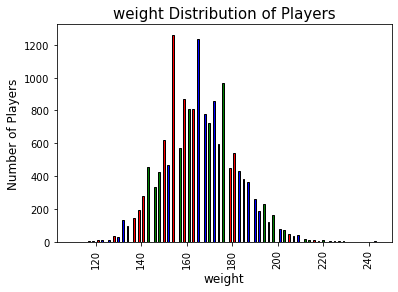

In [109]:
x=pd.DataFrame((name['weight'].value_counts()).reset_index())
x=x.rename(columns={'index':'weight','weight':'count'}) 
x
x=x[(x['count']<9)&(x['count']>1)]
plt.bar(x['weight'],x['count'],color=['red','blue','green'],ec='black')
plt.title('weight Distribution of Players',fontsize='15')
plt.xlabel('weight',fontsize='12')
plt.ylabel('Number of Players',fontsize='12') 
plt.xticks(rotation=90)
plt.show()  

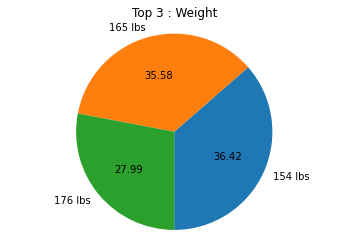

In [118]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
BBBB='154 lbs','165 lbs','176 lbs'
values = [1262,1233,970] 
plt.pie(values,
        labels=BBBB,
        autopct='%0.2f',
        radius=1.4,
        startangle=270
       ) 
ax.axis('equal')
ax.set_title('Top 3 : Weight')
plt.show()   


